In [1]:
import torch
import os
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

$$
N_{\ell}^{TT}=(\theta_{FWHM} \cdot \sigma_T)^2 \exp \left ( \frac{\ell (\ell + 1) \theta_{FWHM}^2}{8 \ln 2}\right )
$$

if $\ell < \ell_{transition}$
$$
dof = round(f_{sky} \cdot (2\ell+1))
$$
$$
\hat{C_{\ell}}=\sum^{dof}_{i=1}X_i^2
$$
$$
X_i \sim N(0, \sqrt{C_{\ell}})
$$

else:
$$
Var(\hat{C_{\ell}})=\frac{2C_{\ell}^2}{f_{sky}(2\ell +1)}
$$
$$
\hat{C_{\ell}} \sim N \left ( C_{\ell}, \sqrt{Var(\hat{C_{\ell})}} \right )
$$


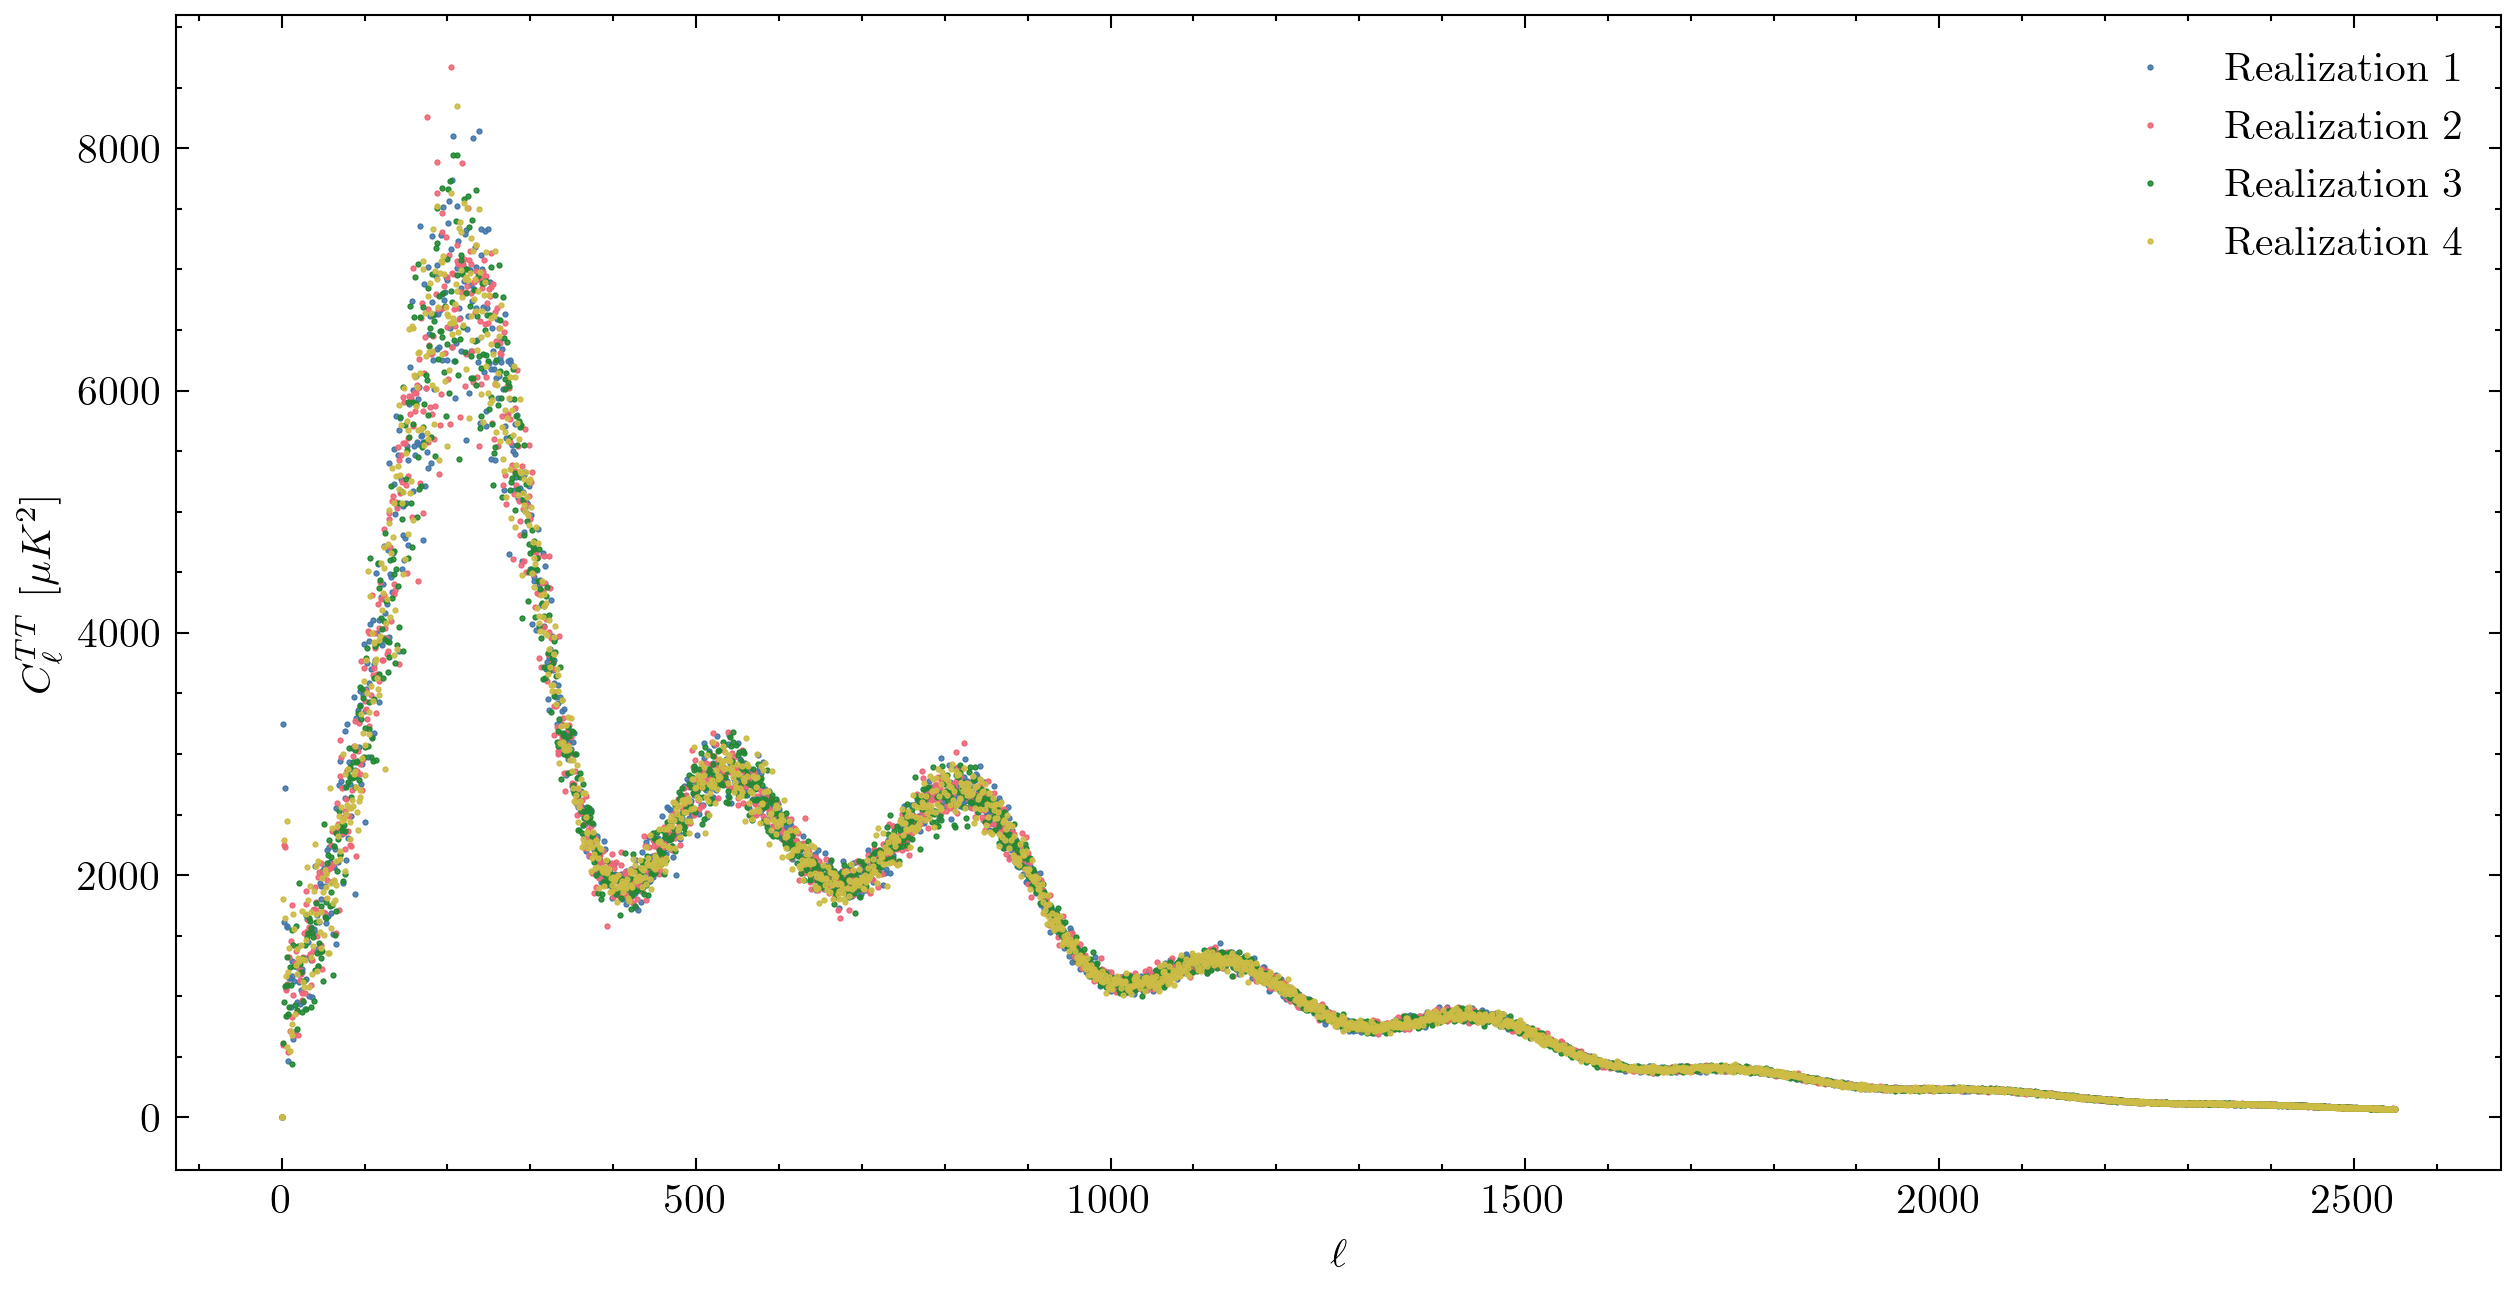

In [15]:
from src.config import PATHS

simulations = torch.load(os.path.join("..",PATHS["simulations"], "Cls_TT_repeat4_noise_25000.pt"), weights_only=True)
theta, Cls = simulations["theta"], simulations["x"]

plt.figure(figsize=(10, 5))
for i in range(4):  
    plt.plot(Cls[i, :], label=f'Realization {i+1}', marker='o', linestyle='', markersize=0.5)

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.savefig("grafico.pdf", dpi=300)
plt.show()

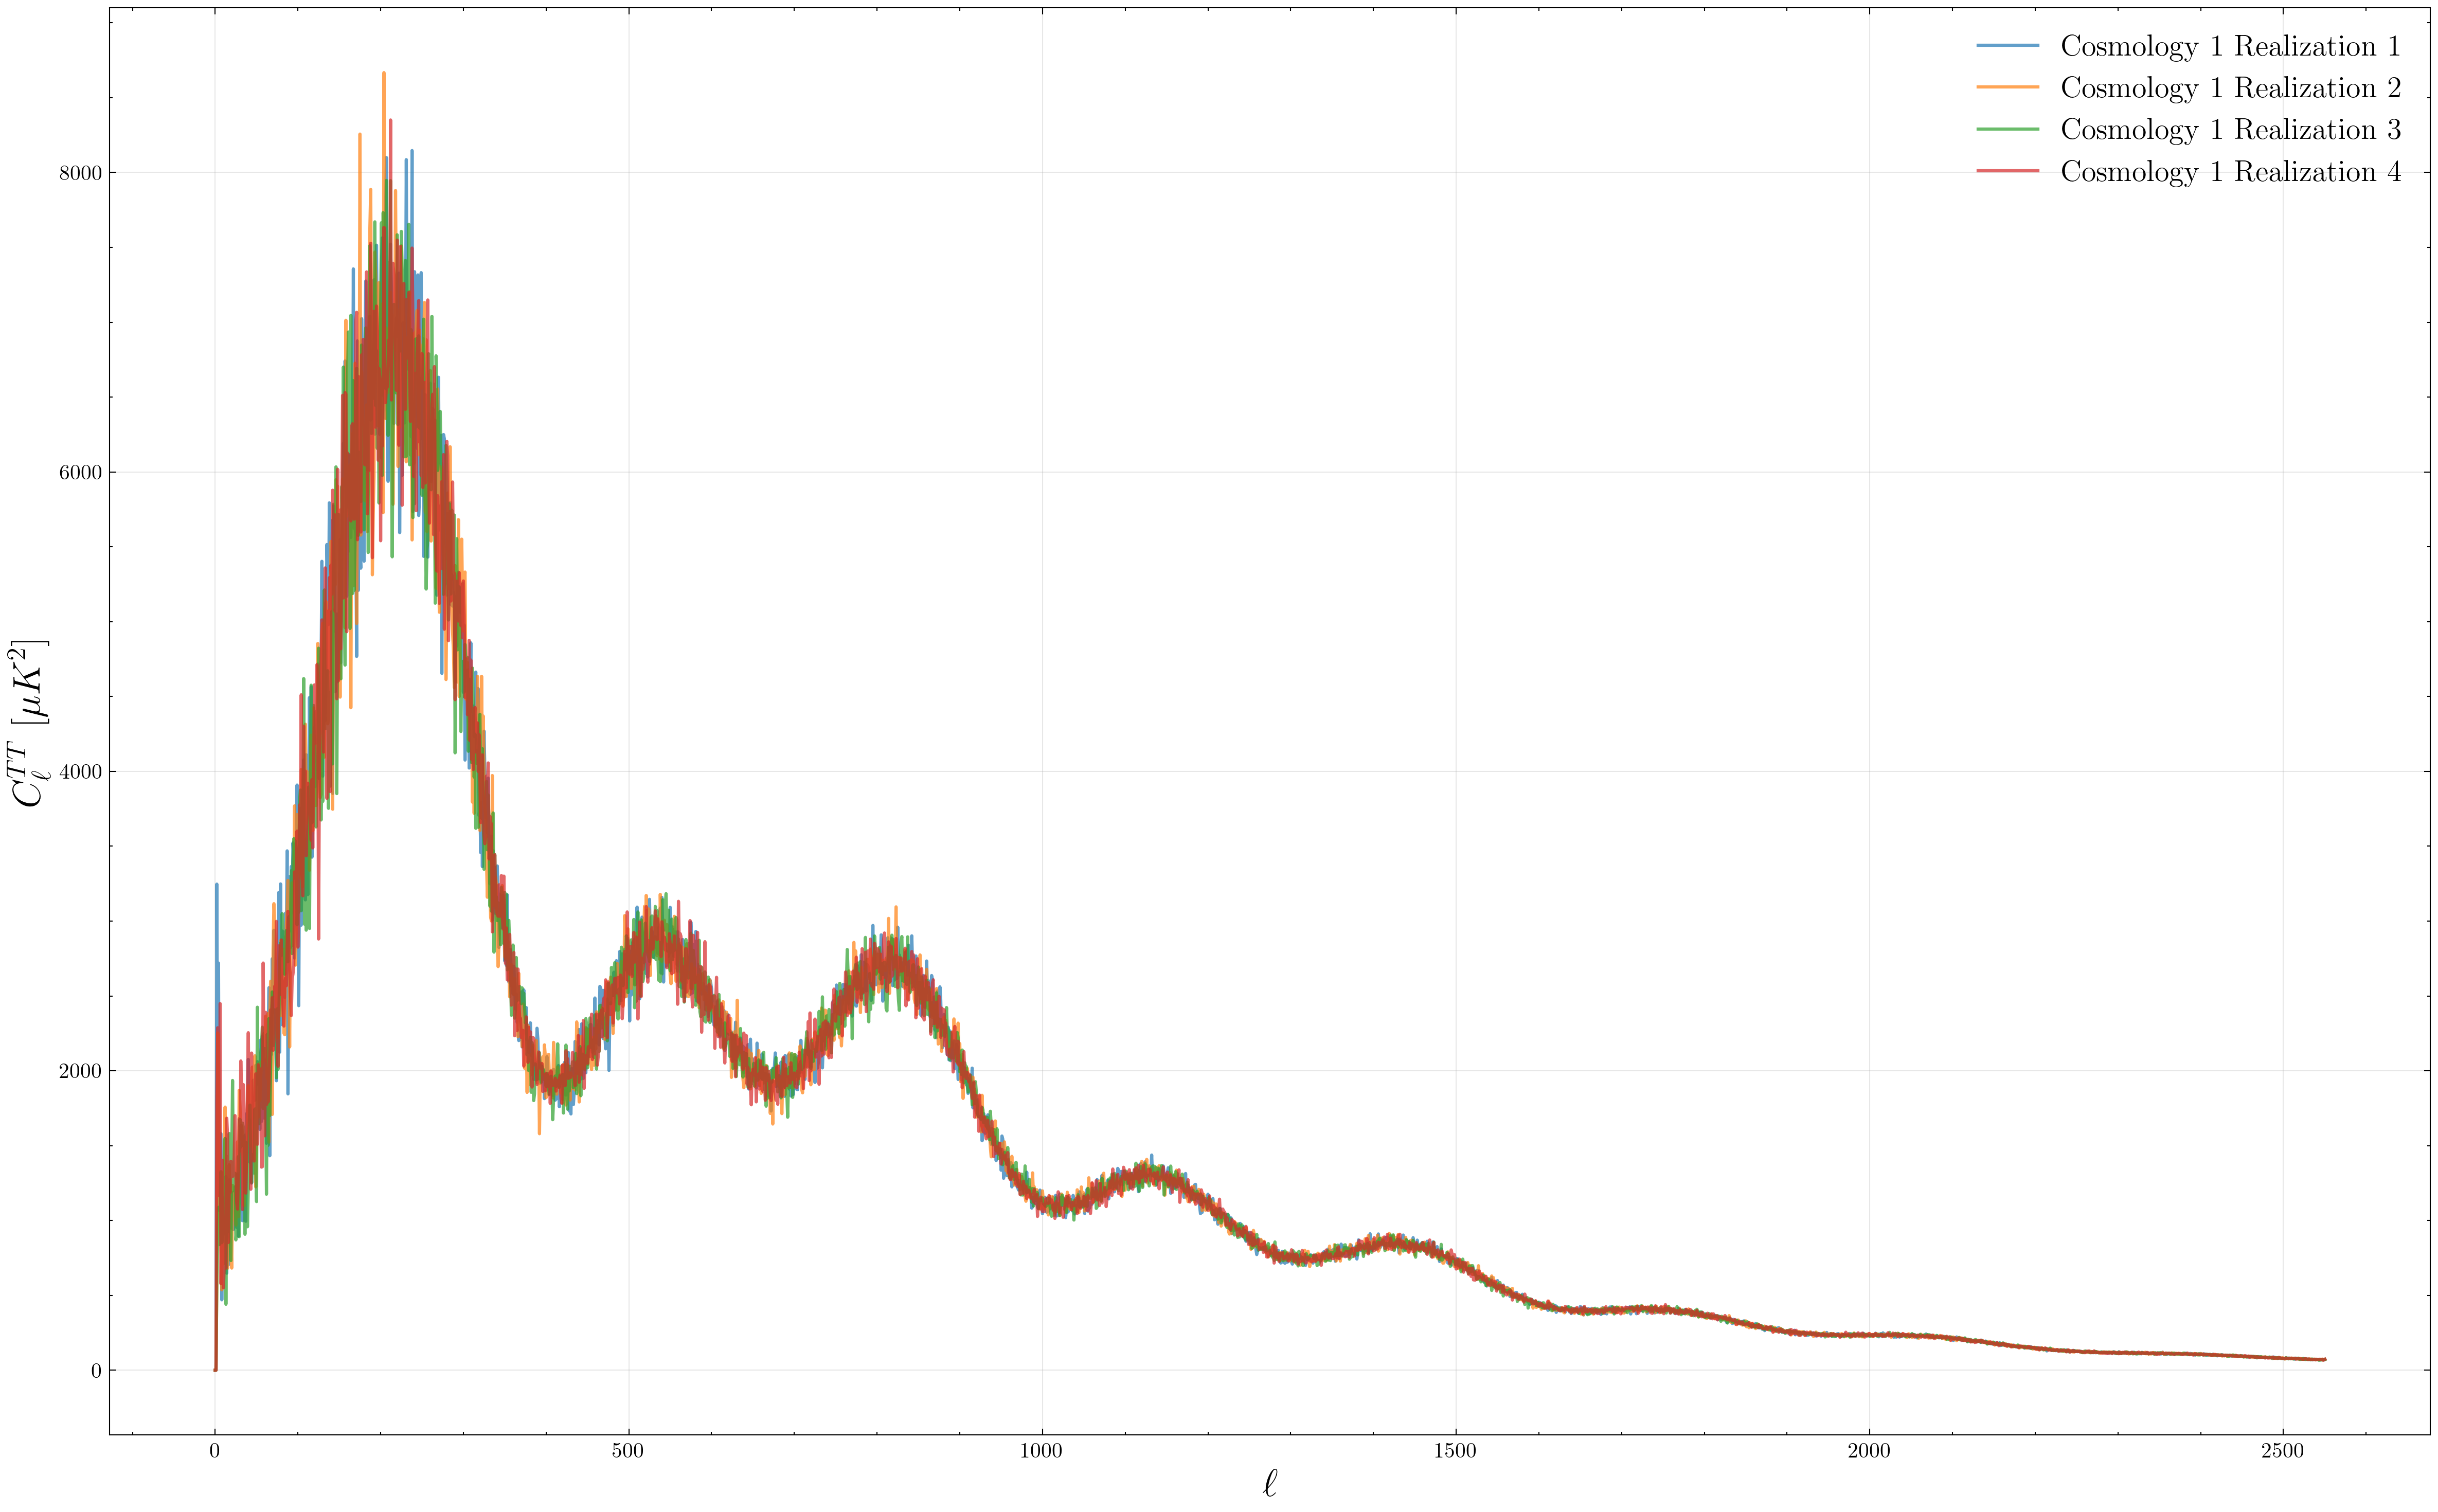

In [10]:
import torch
import os
import matplotlib.pyplot as plt
from src.config import PATHS

# Cargar simulaciones
simulations = torch.load(os.path.join("..", PATHS["simulations"], "Cls_TT_repeat4_noise_25000.pt"), weights_only=True)
theta, Cls = simulations["theta"], simulations["x"]

# Estilo tipo GetDist
plt.figure(figsize=(16, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # colores estilo GetDist
for i in range(4):
    plt.plot(Cls[i, :], label=f'Cosmology 1 Realization {i+1}',
             color=colors[i], alpha=0.7, linewidth=1.5)  # alpha para transparencia, línea más gruesa

plt.xlabel(r'$\ell$', fontsize=18)
plt.ylabel(r'$C_\ell^{TT}$ [$\mu K^2$]', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

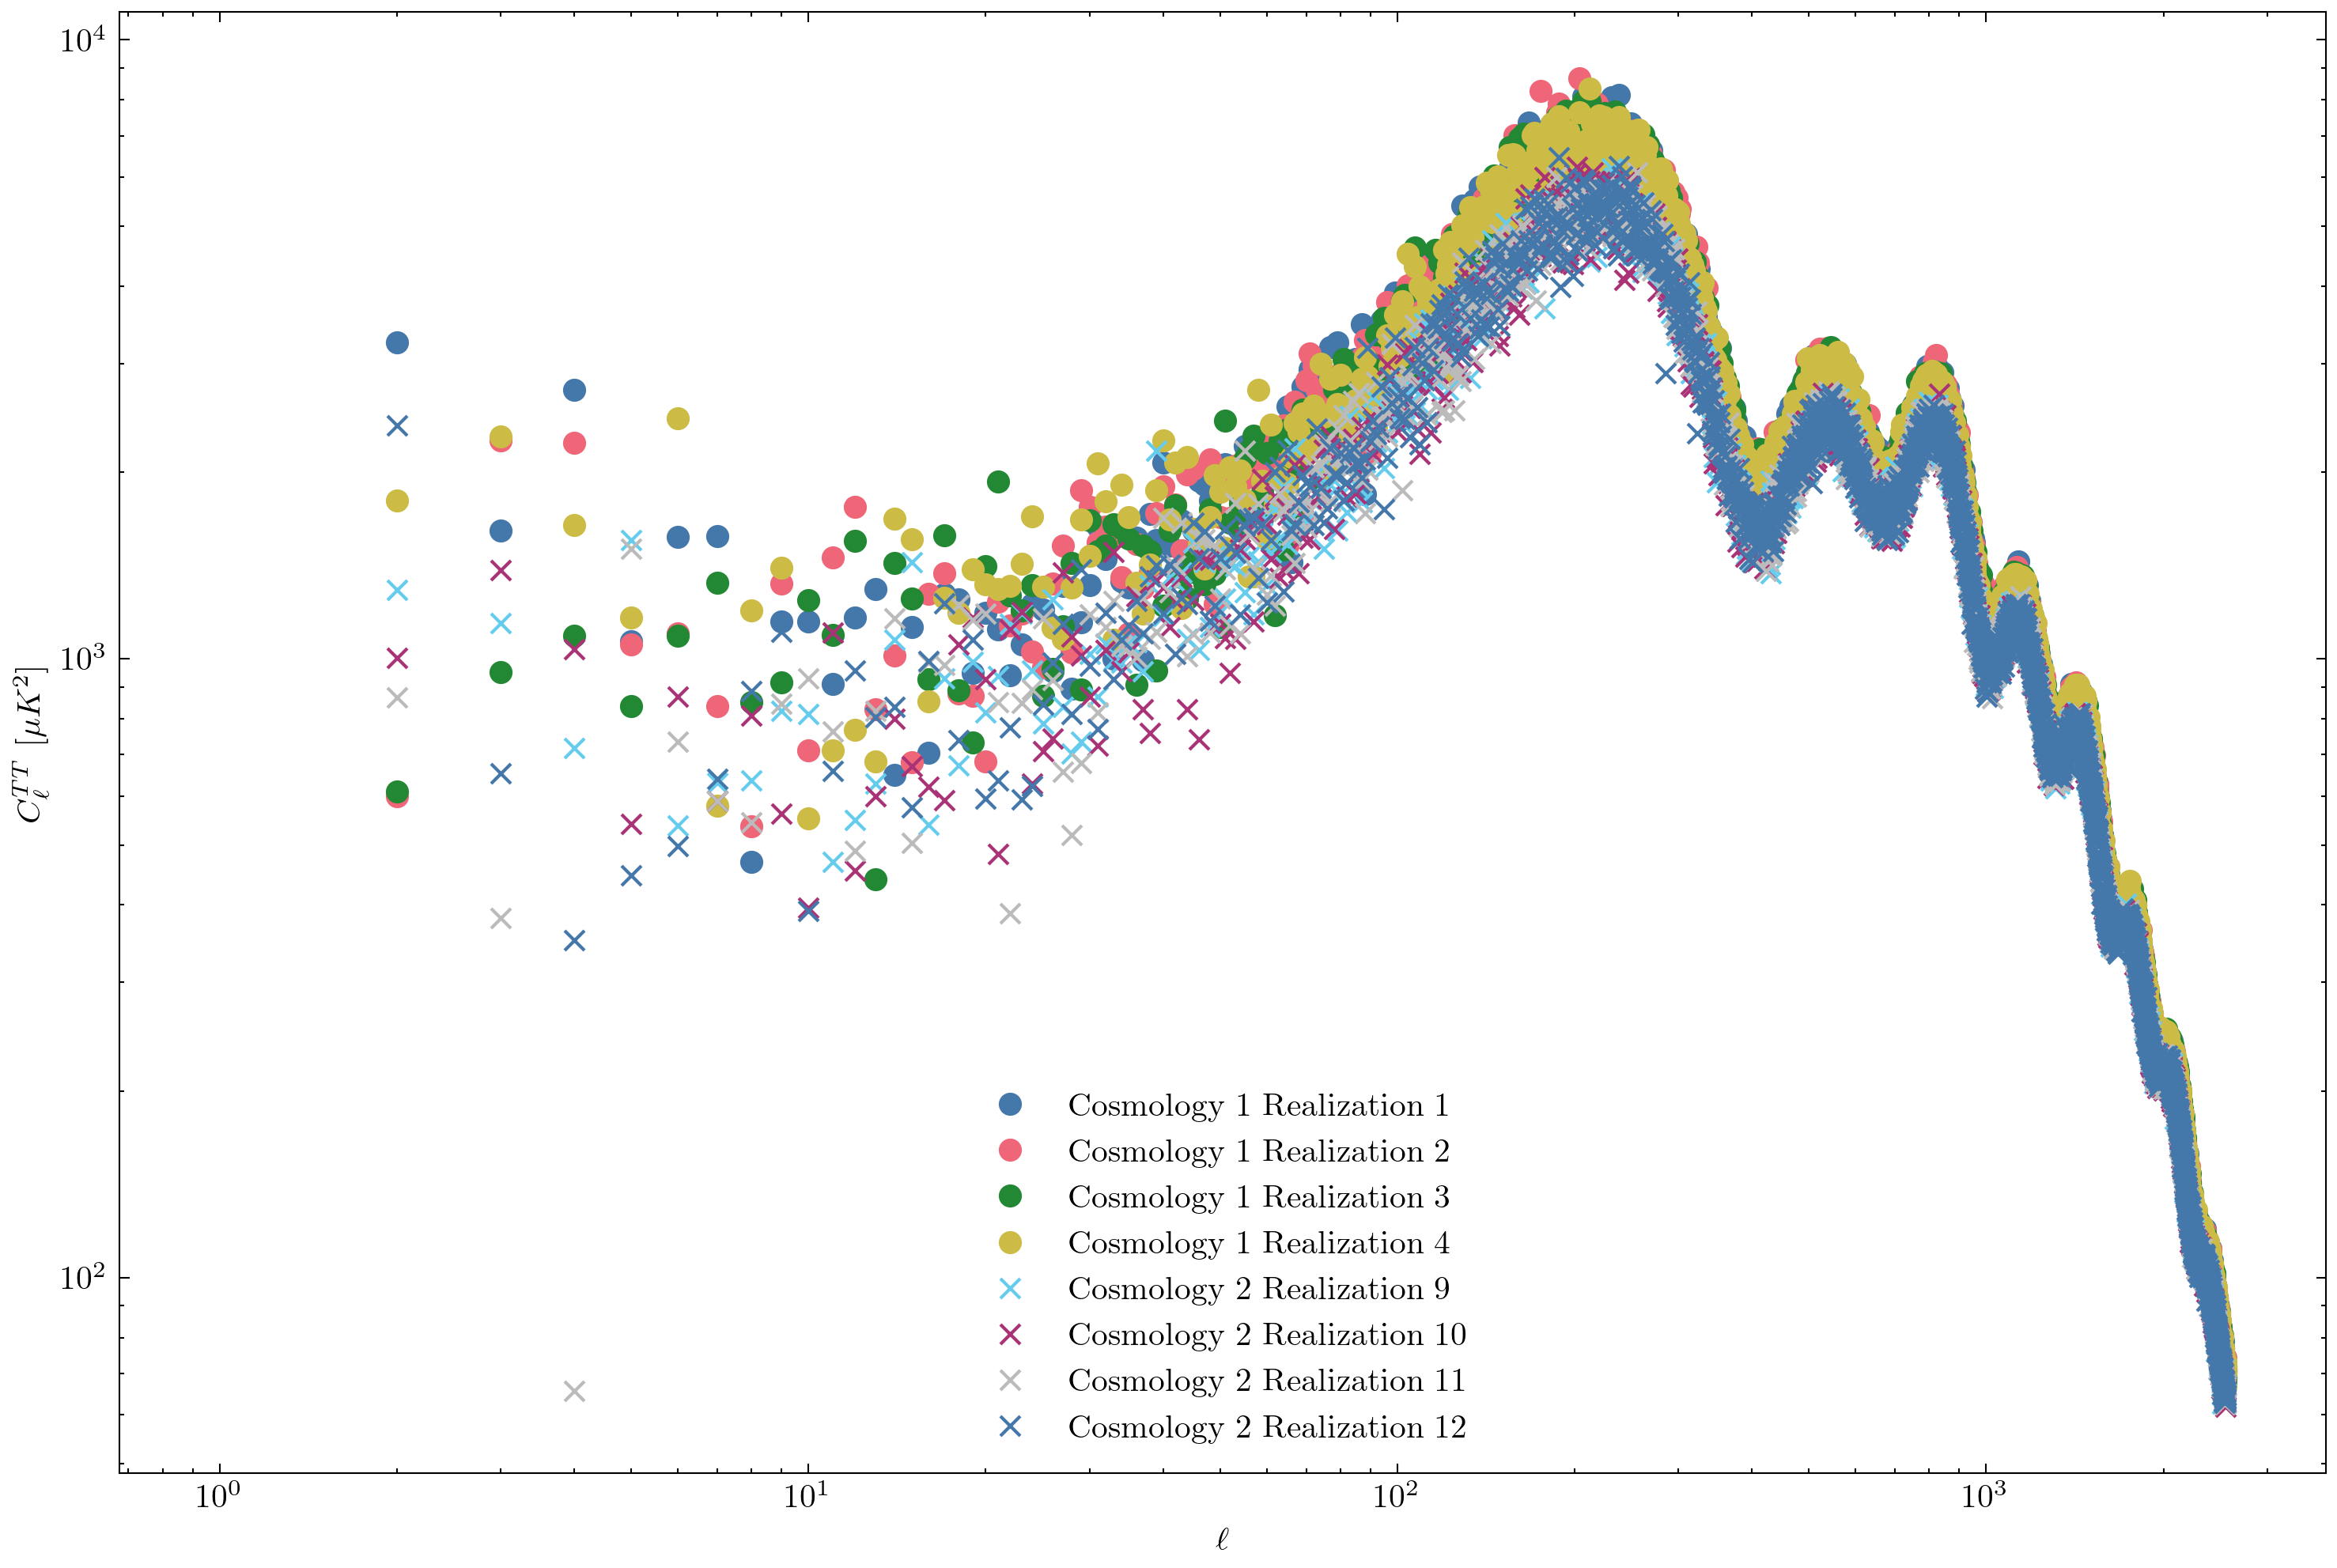

In [12]:
plt.figure(figsize=(12, 8))
for i in range(4):  
    plt.loglog(Cls[i, :], label=f'Cosmology 1 Realization {i+1}', marker='o', linestyle='')

for i in range(4+4*(1), 8+4*(1)):  
    plt.loglog(Cls[i, :], label=f'Cosmology 2 Realization {i+1}', marker='x', linestyle='')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

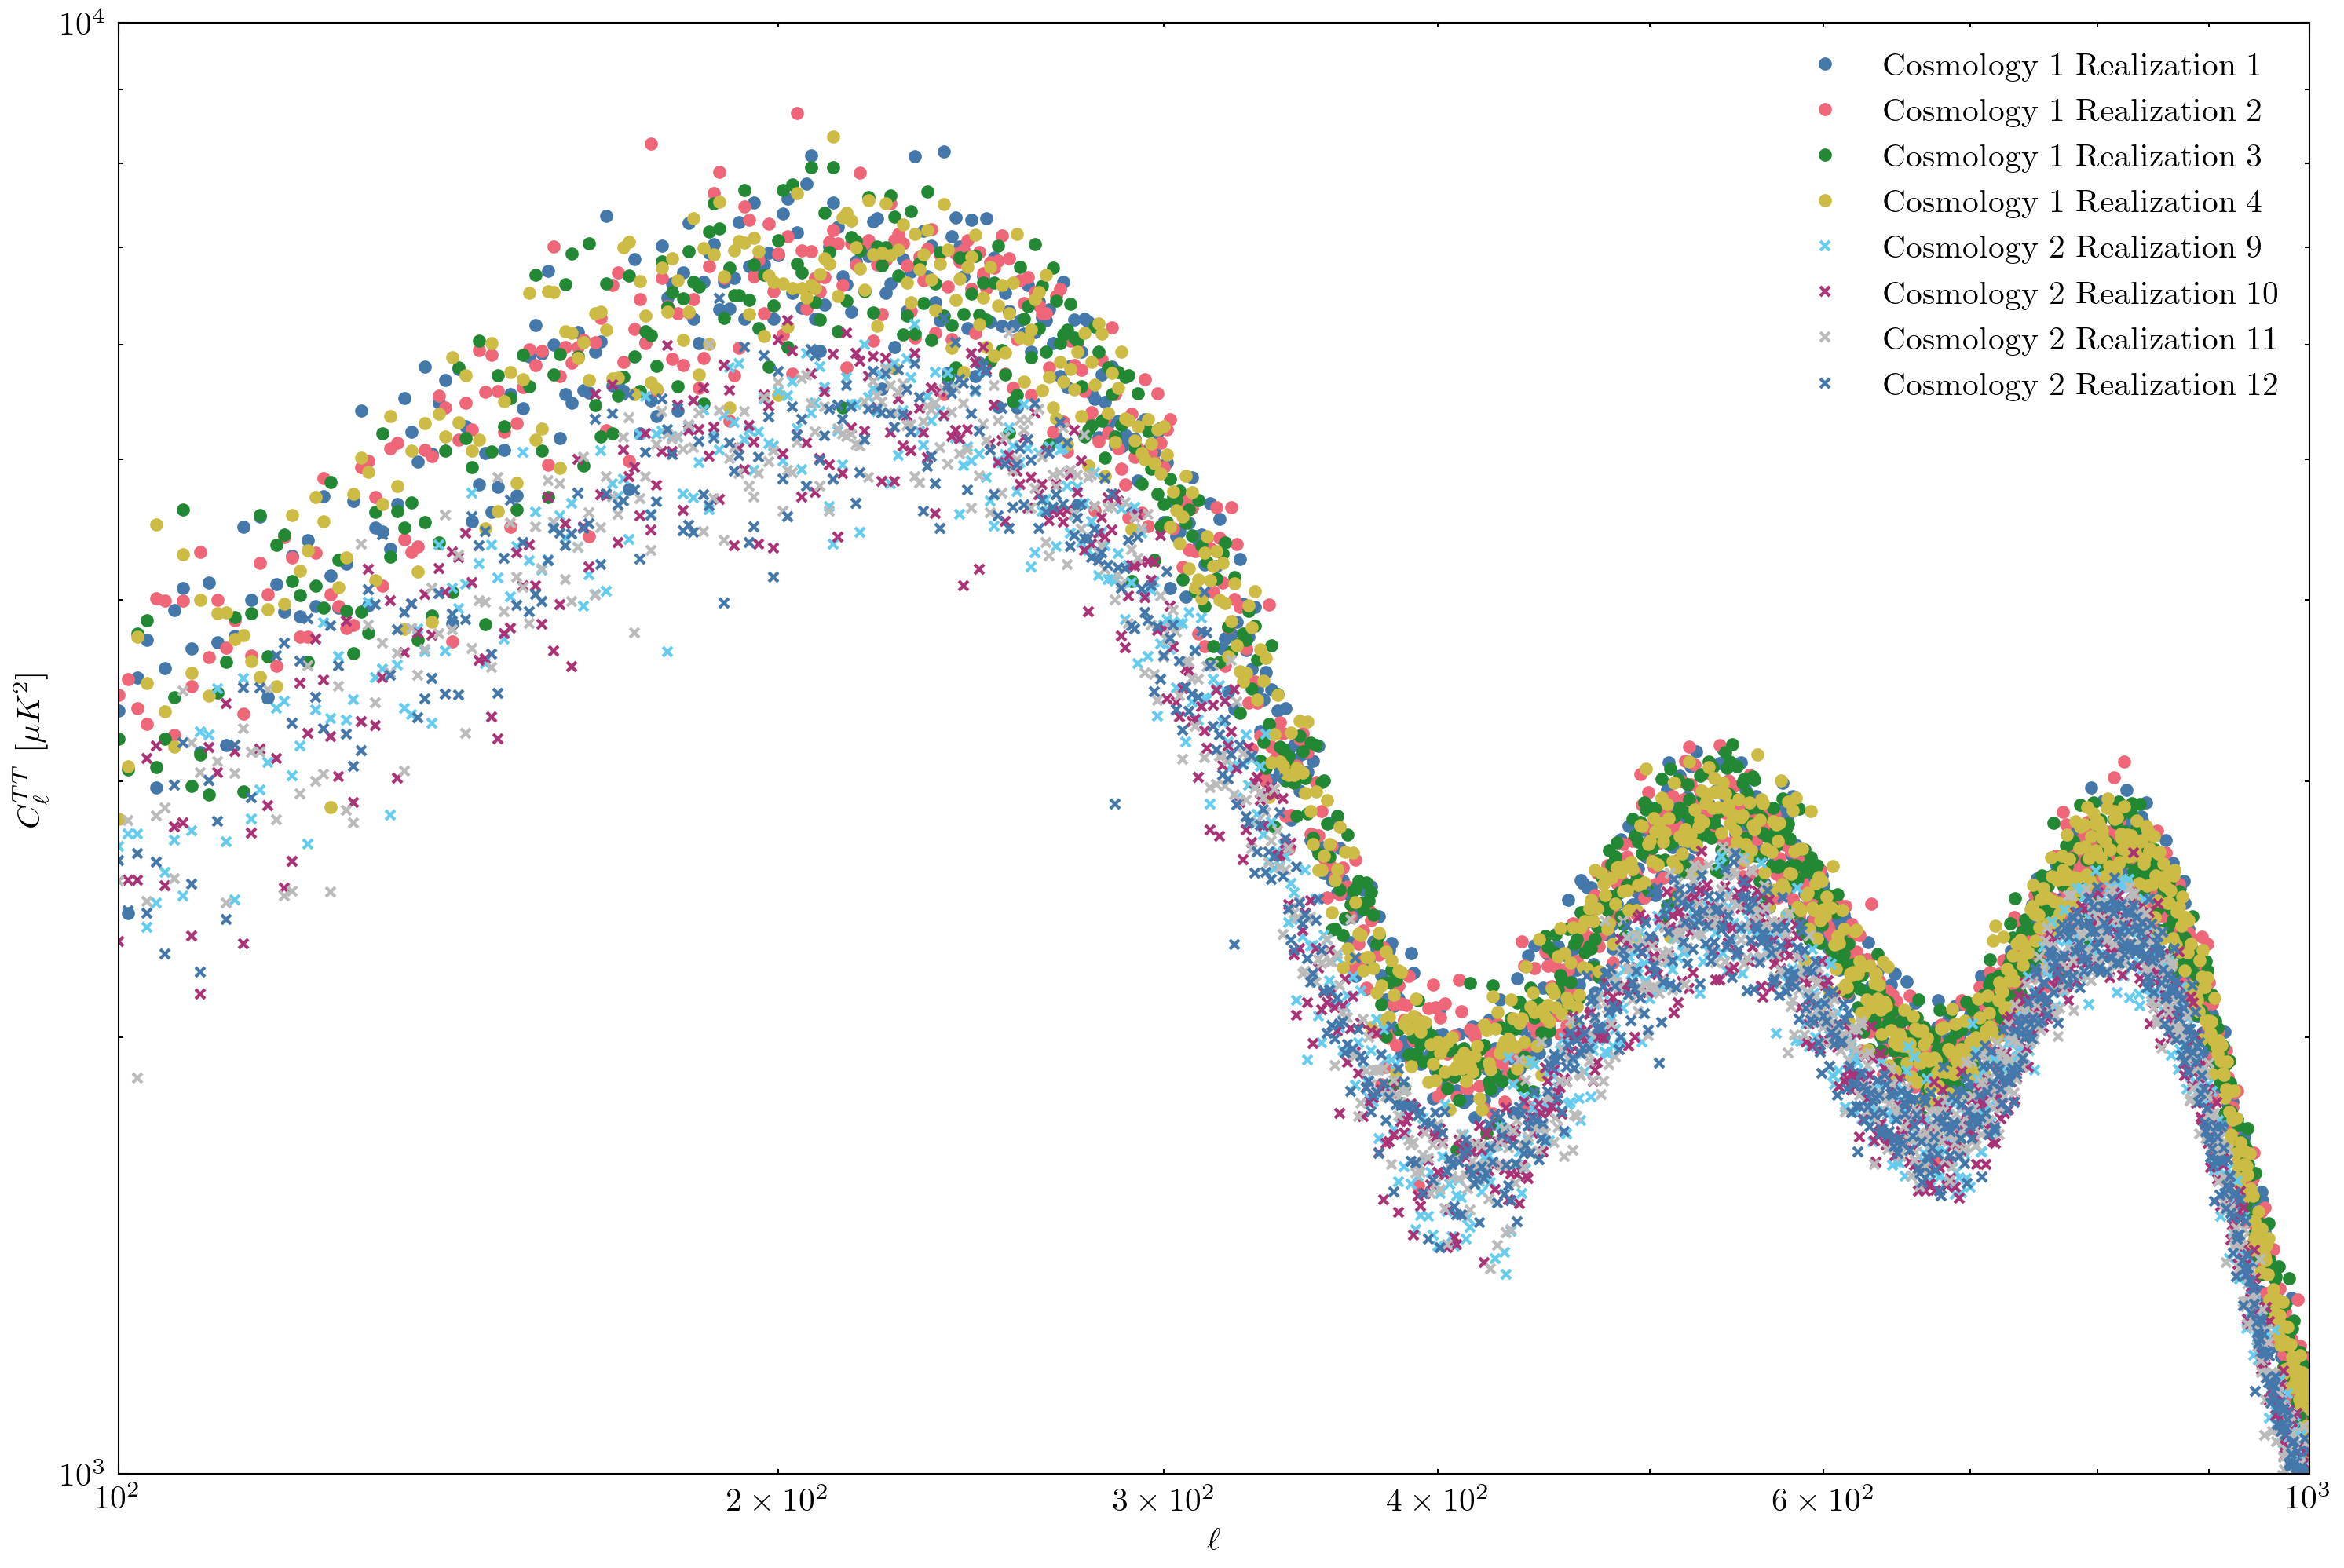

In [18]:
plt.figure(figsize=(12, 8))
for i in range(4):  
    plt.loglog(Cls[i, :], label=f'Cosmology 1 Realization {i+1}', marker='o', linestyle='', markersize=3)

for i in range(4+4*(1), 8+4*(1)):  
    plt.loglog(Cls[i, :], label=f'Cosmology 2 Realization {i+1}', marker='x', linestyle='', markersize=3) 

plt.xlim(10**2, 10**3)
plt.ylim(10**3, 10**4)
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

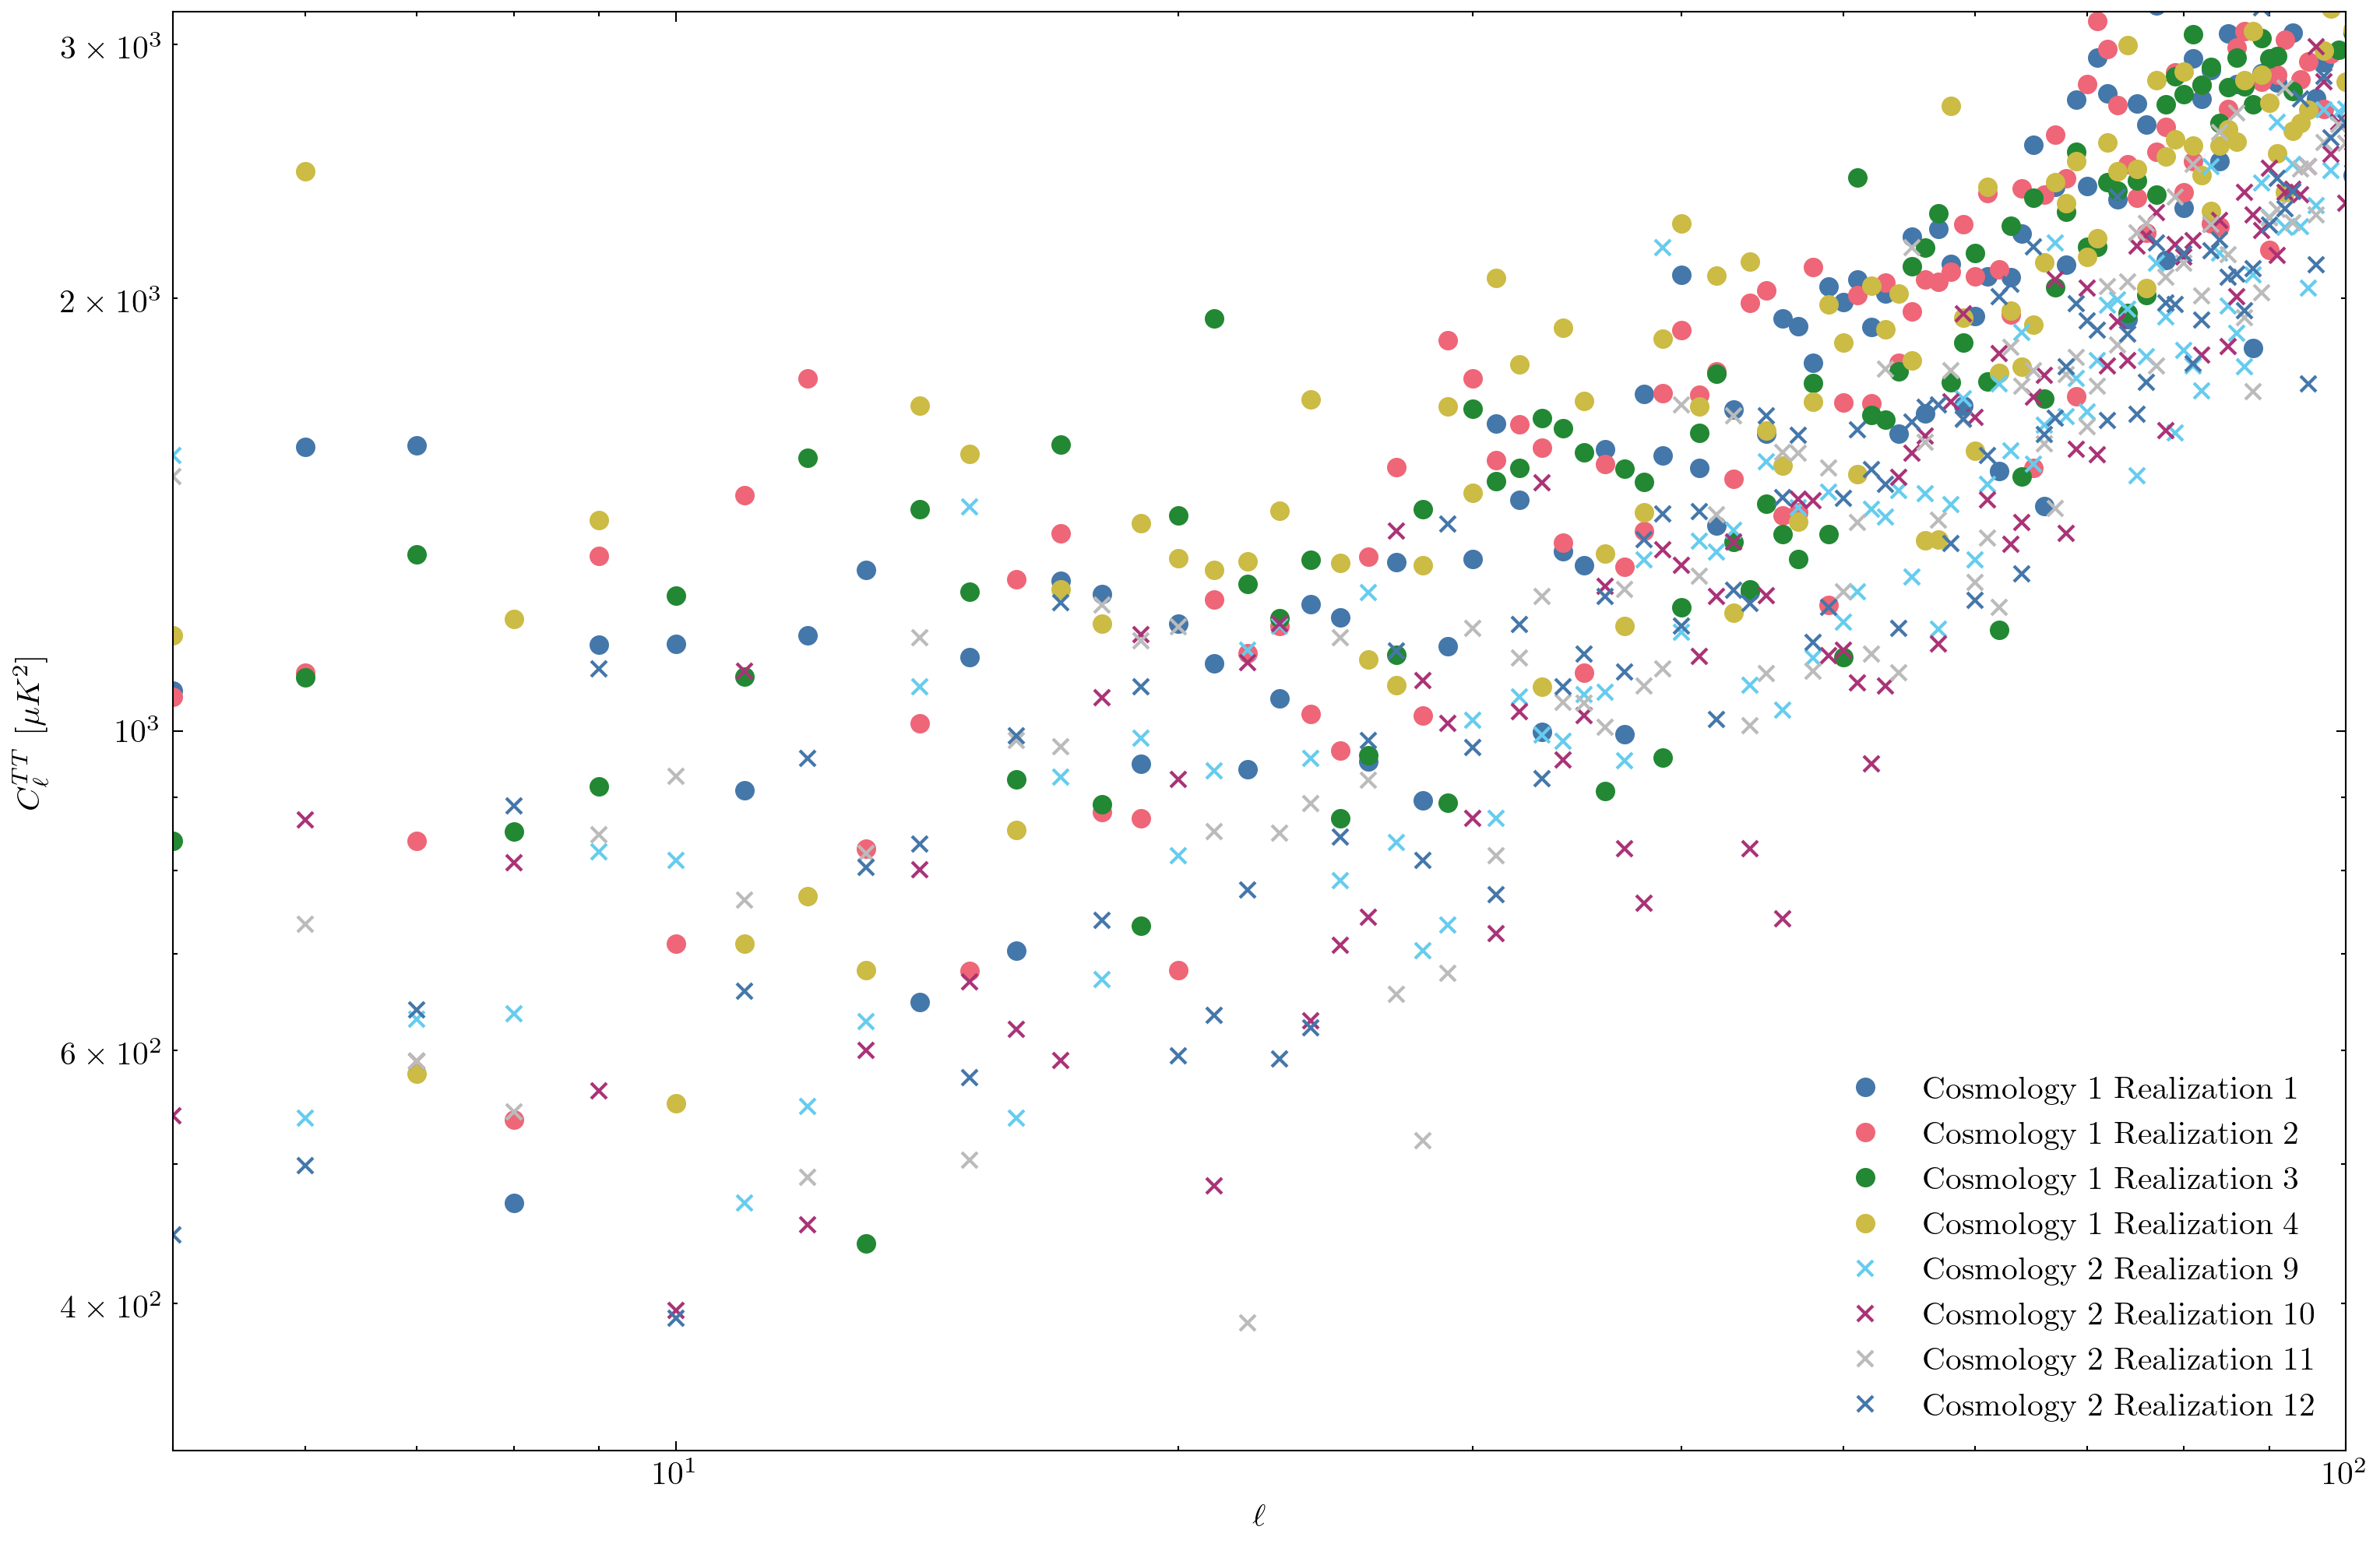

In [22]:
plt.figure(figsize=(12, 8))
for i in range(4):  
    plt.loglog(Cls[i, :], label=f'Cosmology 1 Realization {i+1}', marker='o', linestyle='', markersize=5)

for i in range(4+4*(1), 8+4*(1)):  
    plt.loglog(Cls[i, :], label=f'Cosmology 2 Realization {i+1}', marker='x', linestyle='', markersize=5) 

plt.xlim(5, 100)
plt.ylim(10**2.5, 10**3.5)
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(4):  
    plt.loglog(Cls[i, :], label=f'Cosmology 1 Realization {i+1}', marker='o', linestyle=None)

for i in range(4+4*(1), 8+4*(1)):  
    plt.loglog(Cls[i, :], label=f'Cosmology 2 Realization {i+1}', marker='x')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

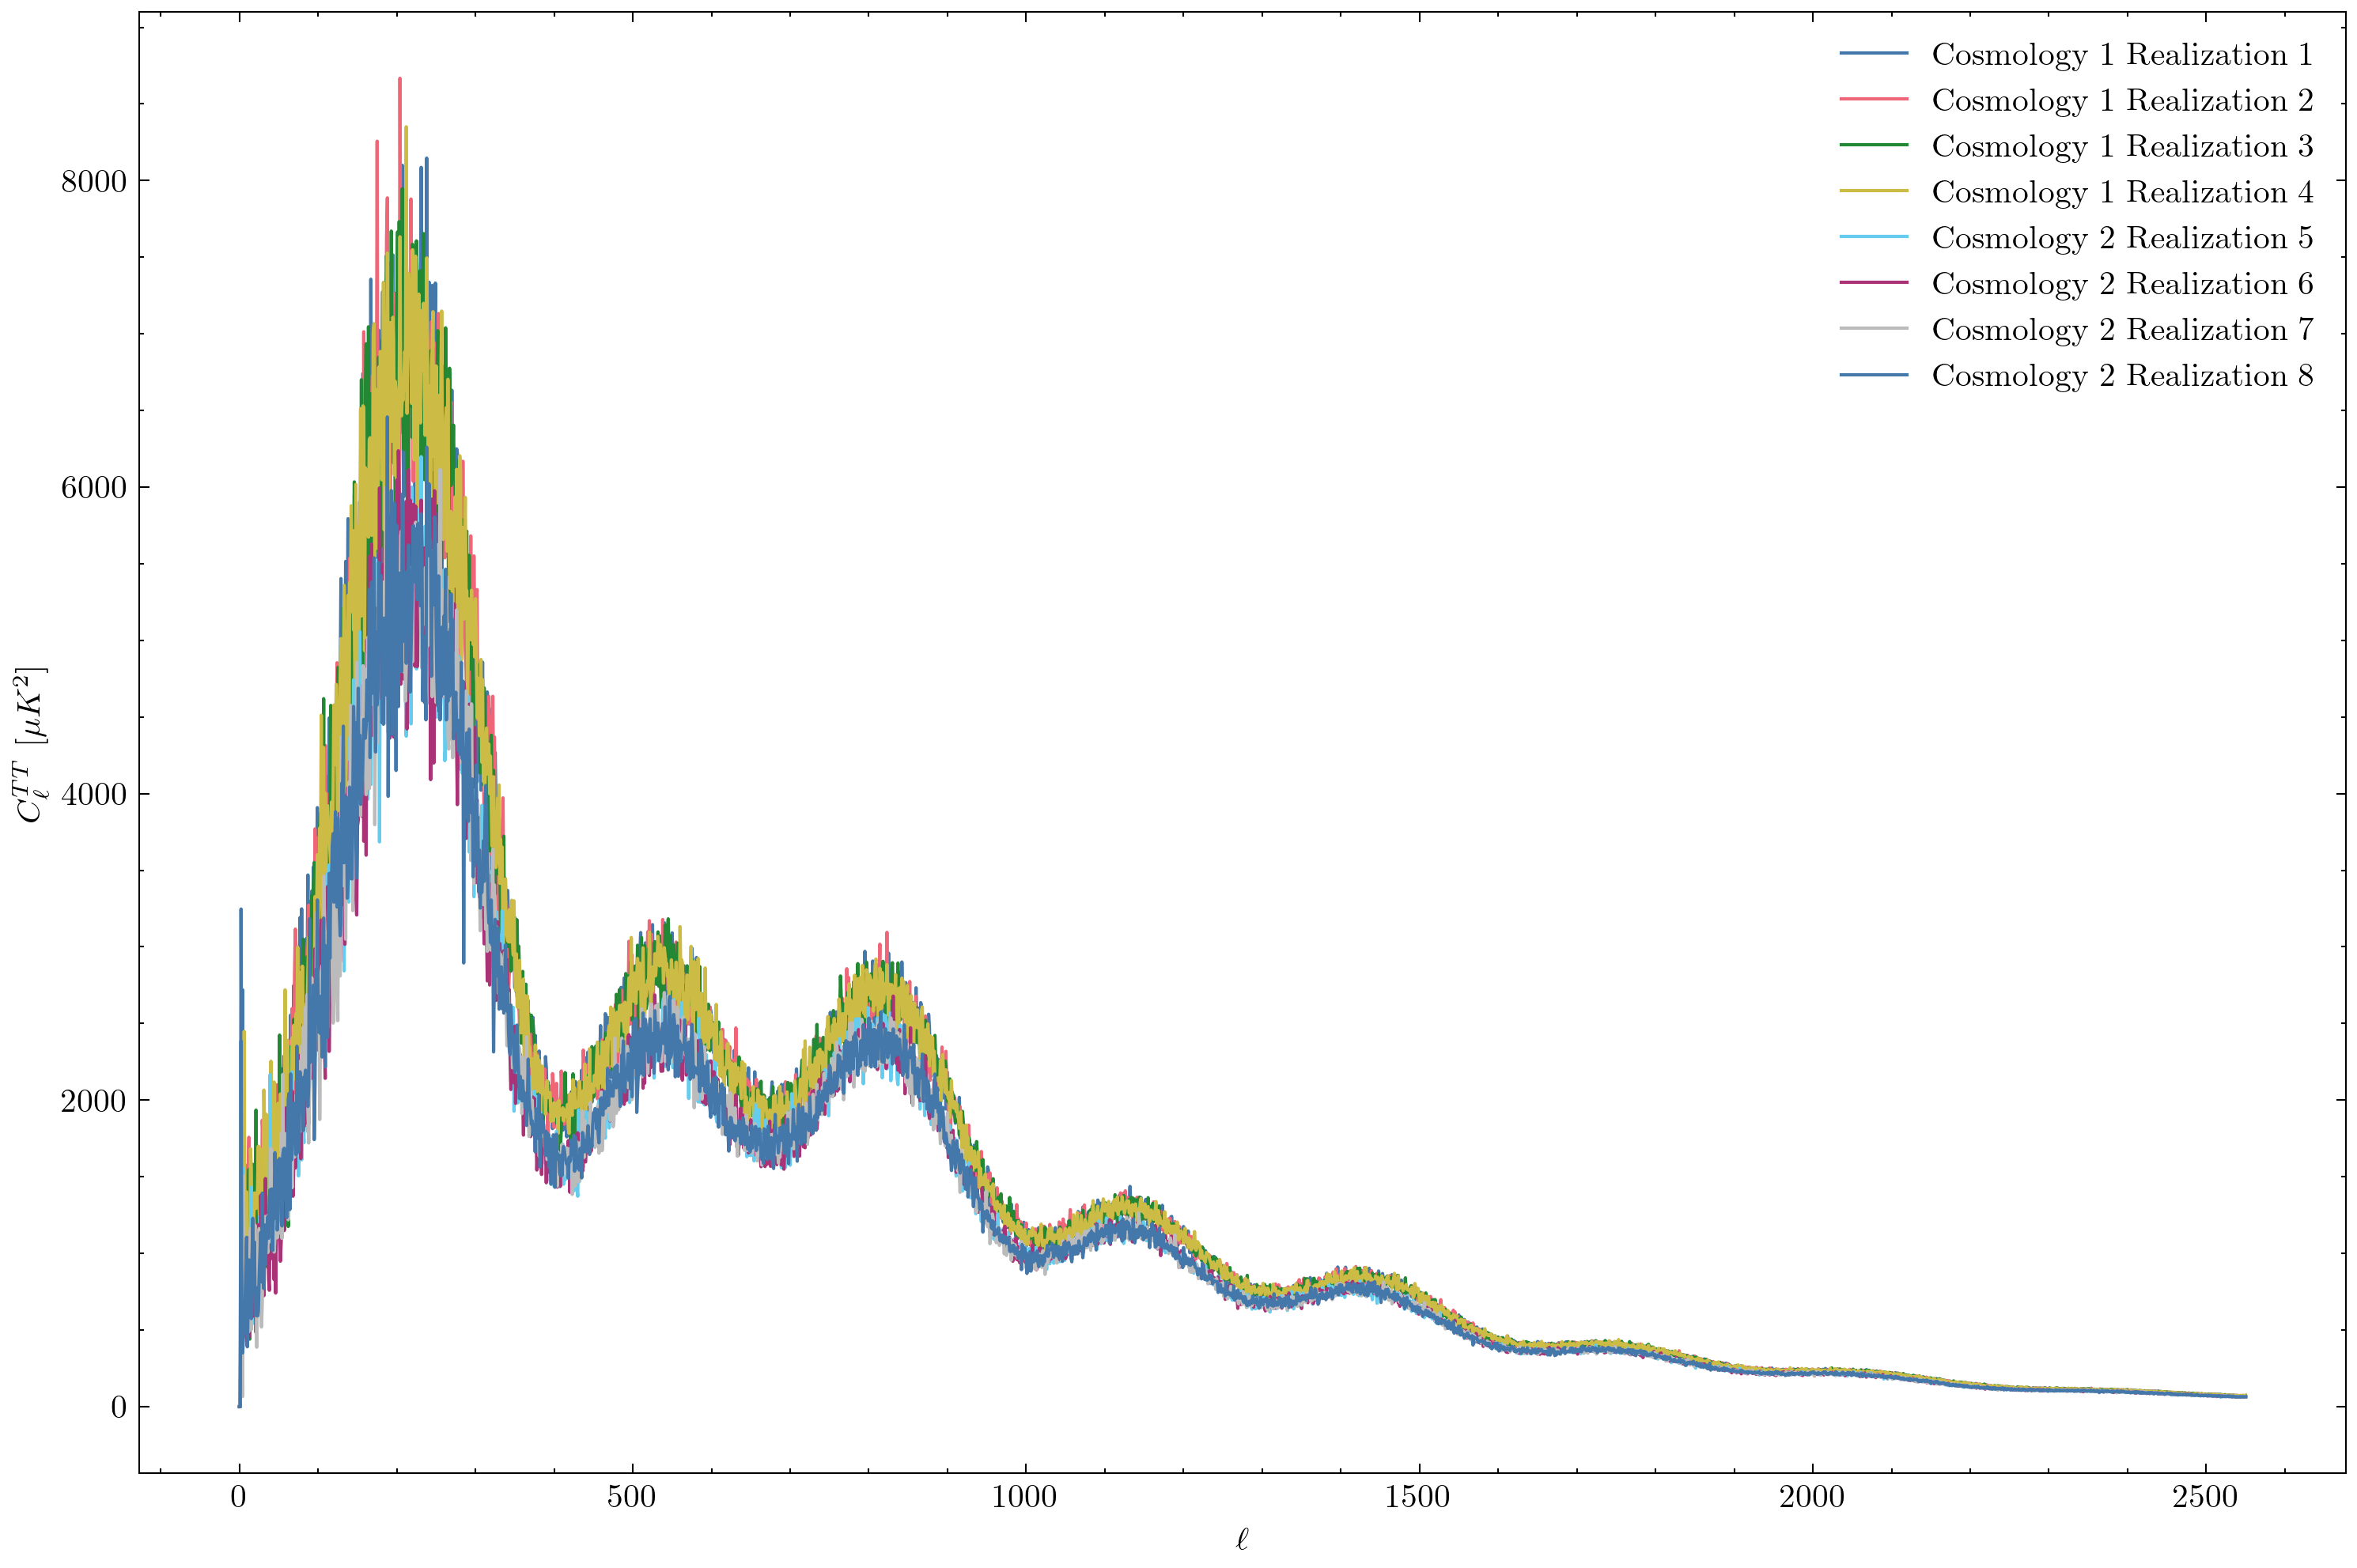

In [ ]:
from src.config import PATHS

simulations = torch.load(os.path.join("..",PATHS["simulations"], "Cls_TT_repeat4_noise_25000.pt"), weights_only=True)
theta, Cls = simulations["theta"], simulations["x"]

plt.figure(figsize=(12, 8))
for i in range(4):  
    plt.plot(Cls[i, :], label=f'Cosmology 1 Realization {i+1}')

for i in range(4+4*(1), 8+4*(1)):  
    plt.plot(Cls[i, :], label=f'Cosmology 2 Realization {i+1}')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()


<Figure size 3600x2400 with 0 Axes>

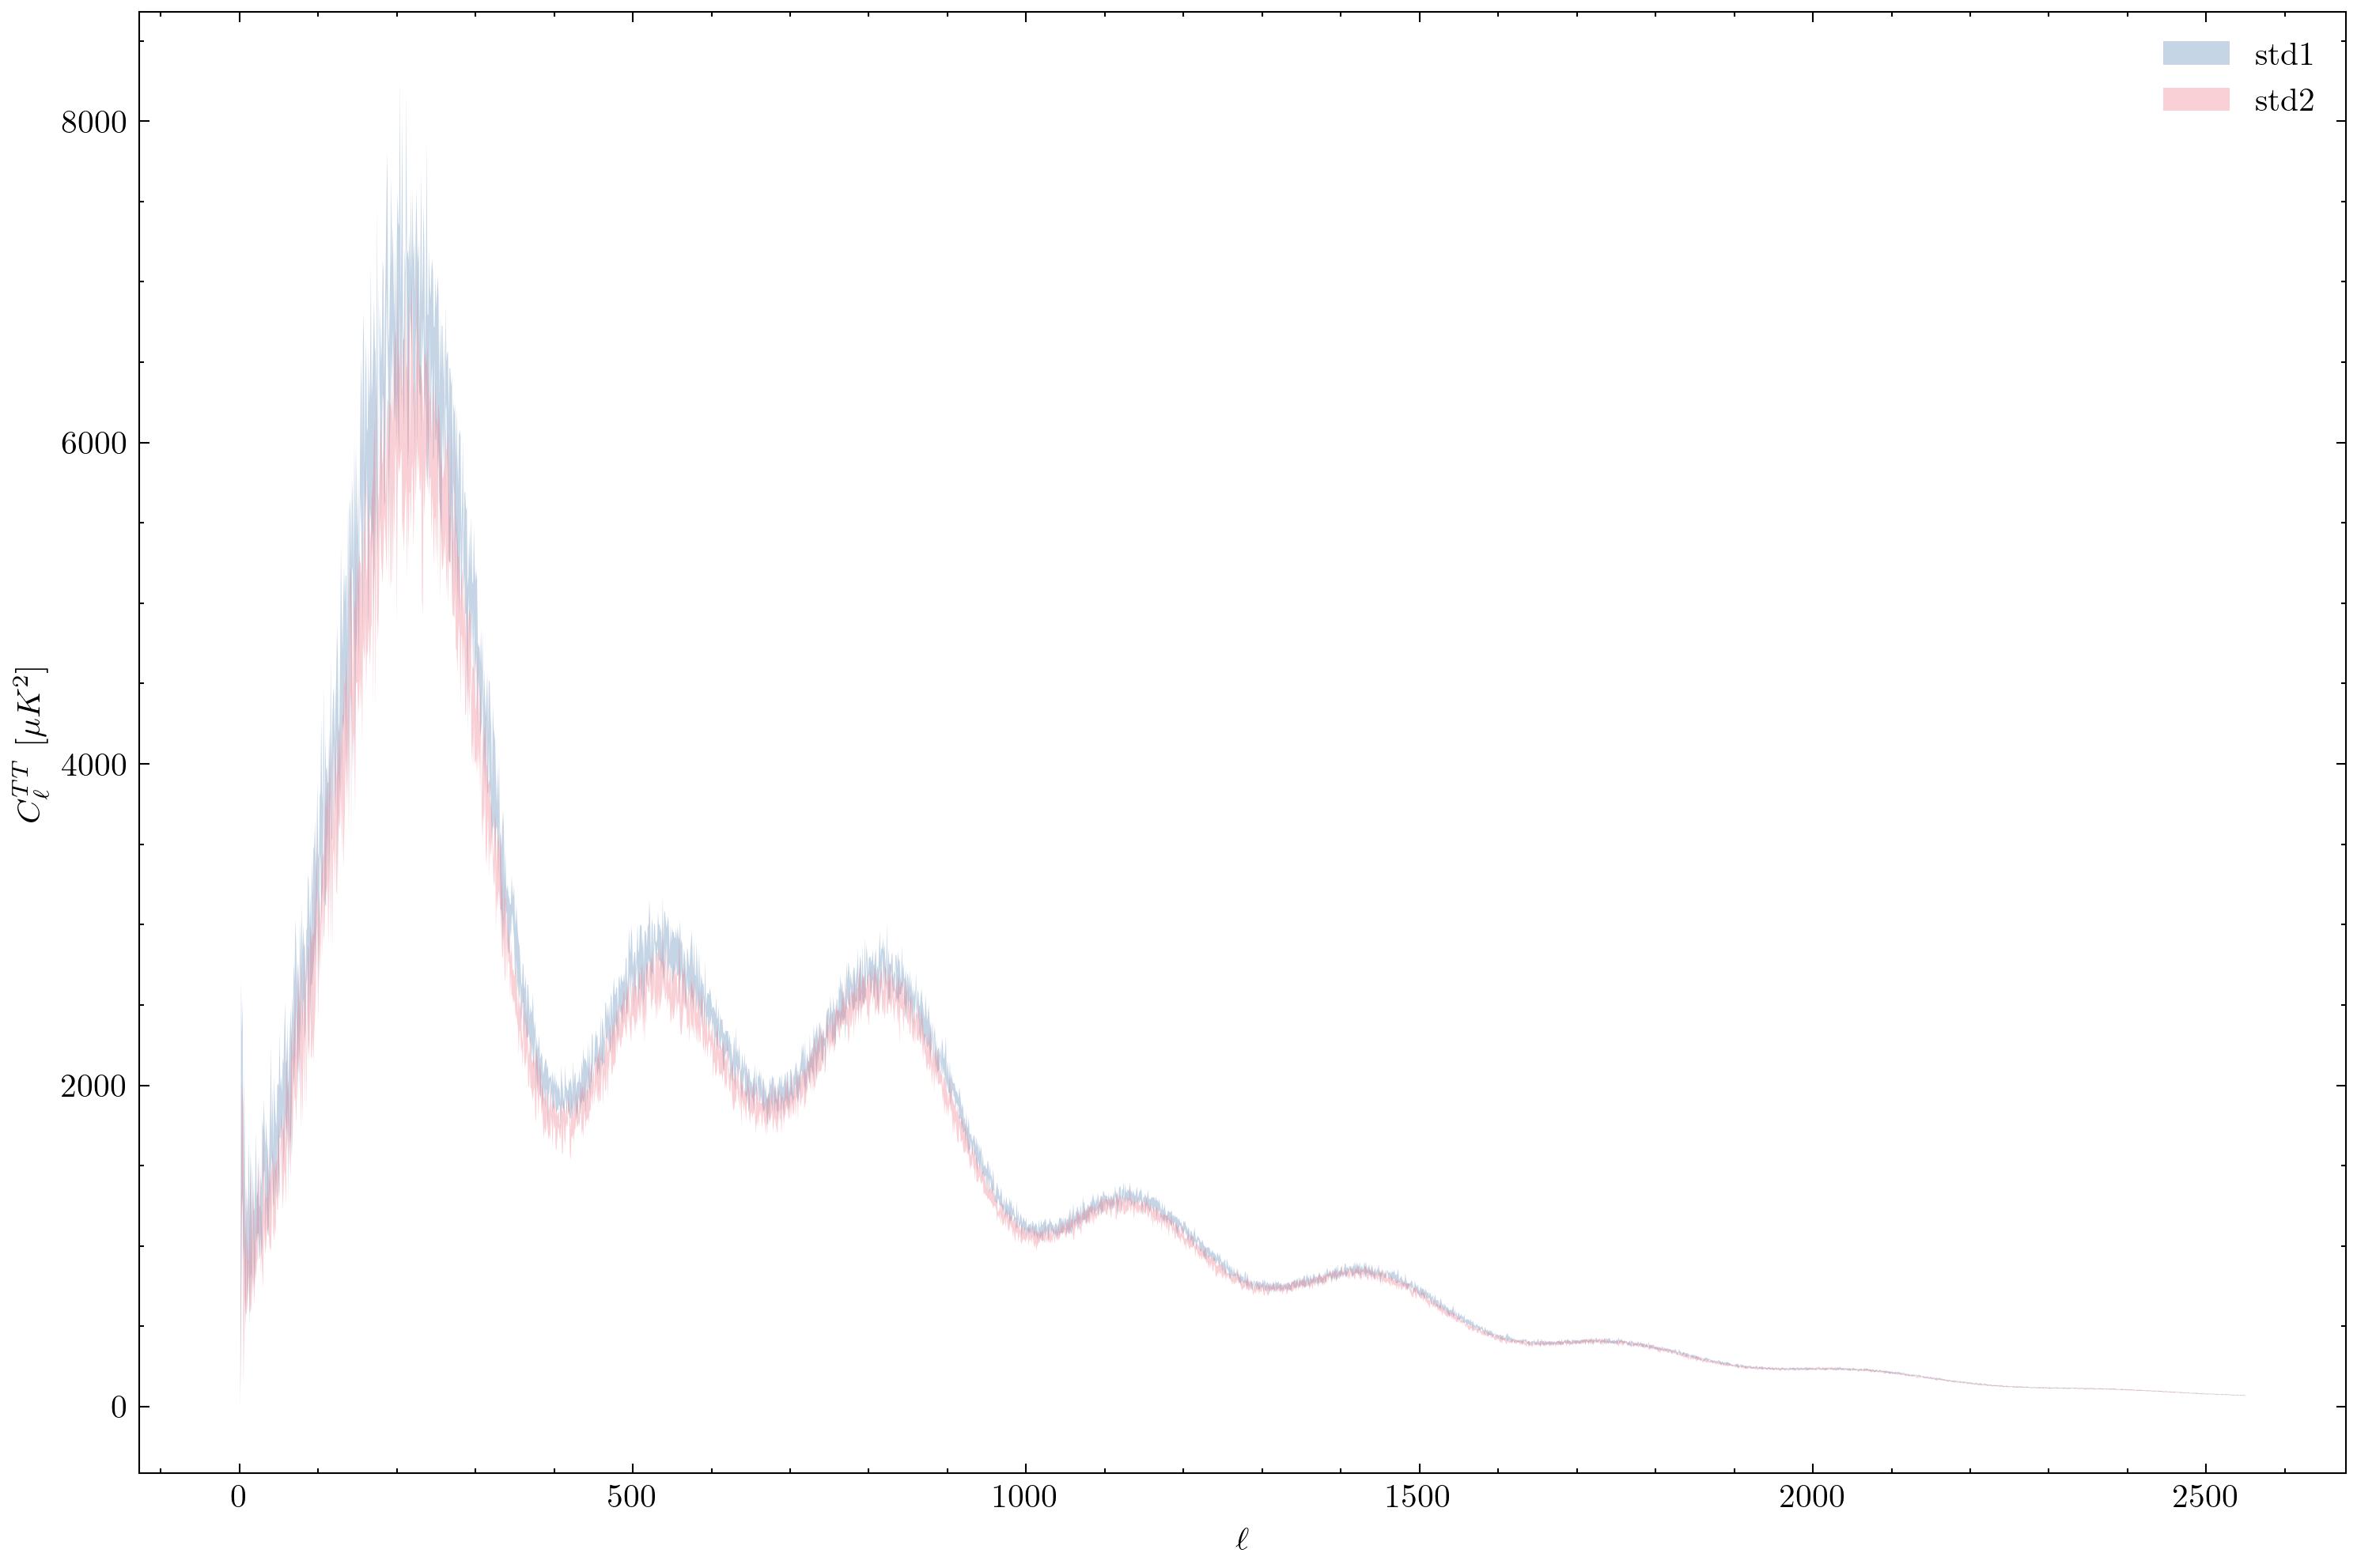

In [16]:
plt.figure(figsize=(12, 8))
Cls1 = Cls[:4]
Cls2 = Cls[4:8]

mean_Cls1 = np.mean(Cls1.numpy(), axis=0)
std_Cls1 = np.std(Cls1.numpy(), axis=0)

mean_Cls2 = np.mean(Cls2.numpy(), axis=0)
std_Cls2 = np.std(Cls2.numpy(), axis=0)


plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cls1)), mean_Cls1 - std_Cls1, mean_Cls1 + std_Cls1, alpha=0.3, label='std1')
plt.fill_between(range(len(mean_Cls2)), mean_Cls2 - std_Cls2, mean_Cls2 + std_Cls2, alpha=0.3, label='std2')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()